<a href="https://colab.research.google.com/github/one-2730/ESAA-24-2/blob/Assignment/ESAA_YB_1014_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#캐글 산탄데르 고객 만족 예측

source: https://www.kaggle.com/c/santander-customer-satisfaction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv('train.csv', encoding = 'latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace = True)

X_features = cust_df.iloc[:, :-1]
y_label = cust_df.iloc[:, -1]
print('피처 데이터 shape: {0}'.format(X_features.shape))

피처 데이터 shape: (76020, 369)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shape: {0}, 테스트 세트 shape: {1}'.format(X_train.shape, y_label.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape: (60816, 369), 테스트 세트 shape: (76020,)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [7]:
#!pip install xgboost==1.5.0
#!pip install pandas==1.3.5

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05, random_state =156, eval_metric = 'auc', early_stopping_rounds = 100)
xgb_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr), (X_val, y_val)], verbose = False)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('AUC: {0:.4f}'.format(xgb_roc_score))

AUC: 0.8417


In [9]:
from hyperopt import hp, fmin, tpe, Trials
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

def objective_func(search_space):
  xgb_clf = XGBClassifier(
      n_estimators = 100,
      max_depth = int(search_space['max_depth']),
      min_child_weicht = int(search_space['min_child_weight']),
      colsample_bytree = search_space['colsample_bytree'],
      learning_rate = search_space['learning_rate'],
      early_stopping_rounds = 30,
      eval_metric = 'auc'
  )

  roc_auc_list = []

  kf = KFold(n_splits = 3)
  for tr_index, val_index in kf.split(X_train):
    X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

    xgb_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr), (X_val, y_val)], verbose = False)

    score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
    roc_auc_list.append(score)

  return -1*np.mean(roc_auc_list)

trials = Trials()

best = fmin(
    fn = objective_func,
    space = xgb_search_space,
    algo = tpe.suggest,
    max_evals = 50,
    trials = trials,
    rstate = np.random.default_rng(seed = 30)
)

print('best:', best)

100%|██████████| 50/50 [43:48<00:00, 52.58s/trial, best loss: -0.8372348885183826]
best: {'colsample_bytree': 0.7422181260175942, 'learning_rate': 0.11032139613770589, 'max_depth': 5.0, 'min_child_weight': 6.0}


In [10]:
xgb_clf = XGBClassifier(
    n_estimators = 500,
    learning_rate = round(best['learning_rate'], 5),
    max_depth = int(best['max_depth']),
    min_child_weight = int(best['min_child_weight']),
    colsample_bytree = round(best['colsample_bytree'], 5),
    early_stopping_rounds = 100,
    eval_metric = 'auc'
)

xgb_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr), (X_val, y_val)], verbose = False)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('AUC: {0:.4f}'.format(xgb_roc_score))

AUC: 0.8455


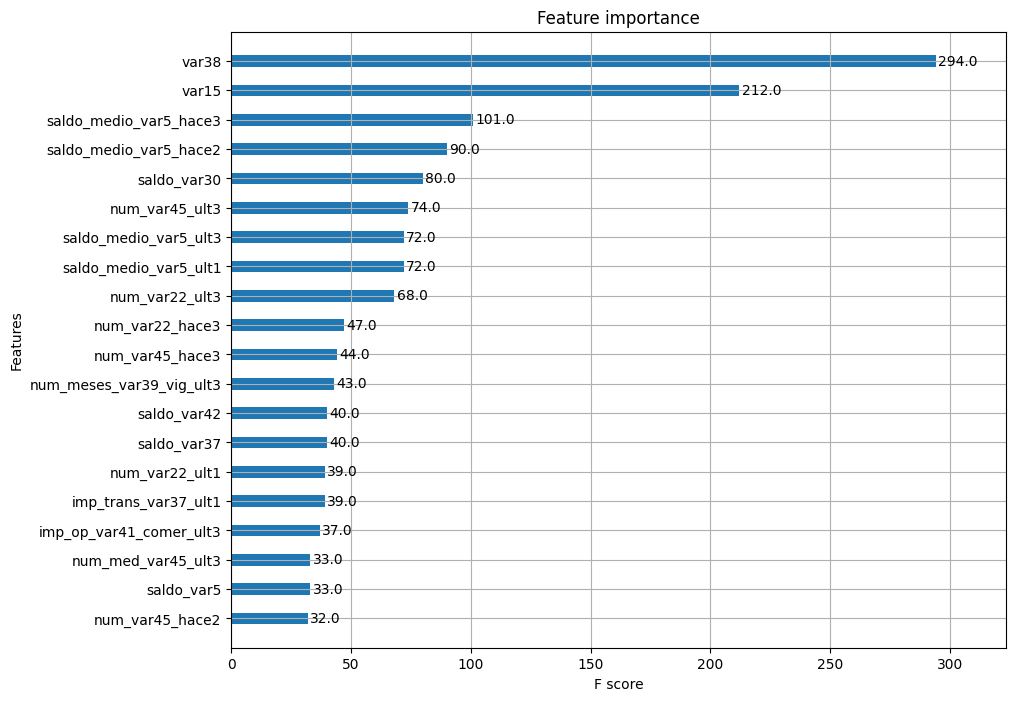

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = 0.4)
plt.show()

##LightGBM

In [20]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500, early_stopping_rounds = 100, eval_metric = 'auc', verbose = -1)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, eval_set = eval_set, )

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('AUC: {0:.4f}'.format(lgbm_roc_score))

AUC: 0.8384


In [19]:
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 100, 160, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

def objective_func(search_space):
  lgbm_clf = LGBMClassifier(
      n_estimators = 100,
      num_leaves = int(search_space['num_leaves']),
      max_depth = int(search_space['max_depth']),
      min_child_samples = int(search_space['min_child_samples']),
      subsample = search_space['subsample'],
      learning_rate = search_space['learning_rate'],
      early_stopping_rounds = 30,
      eval_metric = 'auc',
      verbose = -1
  )

  roc_auc_list = []

  kf = KFold(n_splits = 3)
  for tr_index, val_index in kf.split(X_train):
    X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

    lgbm_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr), (X_val, y_val)])

    score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
    roc_auc_list.append(score)

  return -1*np.mean(roc_auc_list)

trials = Trials()

best = fmin(fn = objective_func, space = lgbm_search_space, algo = tpe.suggest, max_evals = 50, trials = trials, rstate = np.random.default_rng(seed = 30))
print('best:', best)

100%|██████████| 50/50 [06:46<00:00,  8.13s/trial, best loss: -0.835966039415564]
best: {'learning_rate': 0.07283348800335702, 'max_depth': 133.0, 'min_child_samples': 89.0, 'num_leaves': 32.0, 'subsample': 0.7011491391896255}


In [22]:
lgbm_clf = LGBMClassifier(
    n_estimators = 500,
    num_leaves = int(best['num_leaves']),
    max_depth = int(best['max_depth']),
    min_child_samples = int(best['min_child_samples']),
    subsample = round(best['subsample'], 5),
    learning_rate = round(best['learning_rate'], 5),
    early_stopping_rounds = 100,
    eval_metric = 'auc',
    verbose = -1
)

lgbm_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('AUC: {0:.4f}'.format(lgbm_roc_score))

AUC: 0.8455


#캐글 신용카드 사기 검출

source: www.kaggle.com/mlg-ulb/creditcardfraud

##언더 샘플링, 오버 샘플링

불균형한 데이터를 처리하는 방법

1. 언더 샘플링   
    : 많은 레이블을 가진 데이터셋을 적은 레이블을 가진 데이터셋 수준으로 감소
      너무 많은 정상 레이블 데이터를 감소시켜 제대로된 학습을 하지 못할 가능성 존재

2. 오버 샘플링   
    : 적은 데이터셋을 많은 레이블을 가진 데이터셋 수준으로 증식
      단순히 증가시키면 과적합의 문제가 발생하므로 약간씩 변형시켜 증식시킴
      예) SMOTE: KNN을 활용해 데이터와 이웃들의 차이를 일정 값으로 만듦

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df = None):
  df_copy = df.copy()
  df_copy.drop('Time', axis = 1, inplace = True)
  return df_copy

def get_train_test_dataset(df = None):
  df_copy = get_preprocessed_df(df)
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0, stratify = y_target)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [30]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def get_clf_eval(y_test, pred = None, pred_proba = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1{3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85280    15]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8598, 재현율: 0.6216, F10.7216, AUC: 0.8107


In [31]:
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

오차행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F10.8453, AUC: 0.8783


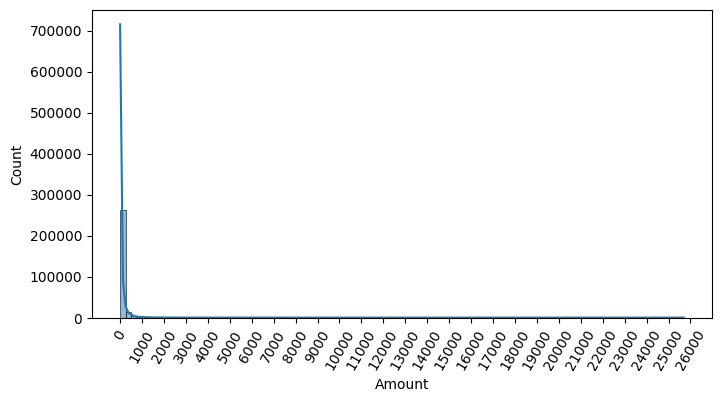

In [32]:
import seaborn as sns

plt.figure(figsize = (8, 4))
plt.xticks(range(0, 30000, 1000), rotation = 60)
sns.histplot(card_df['Amount'], bins = 100, kde = True)
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df = None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
  return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

print('### LGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1)
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

오차행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284, F10.7294, AUC: 0.8141
### LGBM 예측 성능 ###
오차행렬
[[85191   104]
 [  101    47]]
정확도: 0.9976, 정밀도: 0.3113, 재현율: 0.3176, F10.3144, AUC: 0.6582


In [34]:
def get_perprocessed_df(df = None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
  return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회위 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_train = y_train, tgt_test = y_test)

### 로지스틱 회위 예측 성능 ###
오차행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284, F10.7294, AUC: 0.8141
### LightGBM 예측 성능 ###
오차행렬
[[85191   104]
 [  101    47]]
정확도: 0.9976, 정밀도: 0.3113, 재현율: 0.3176, F10.3144, AUC: 0.6582


## 이상치 데이터 제거 후 모델 학습/예측/평가

<Axes: >

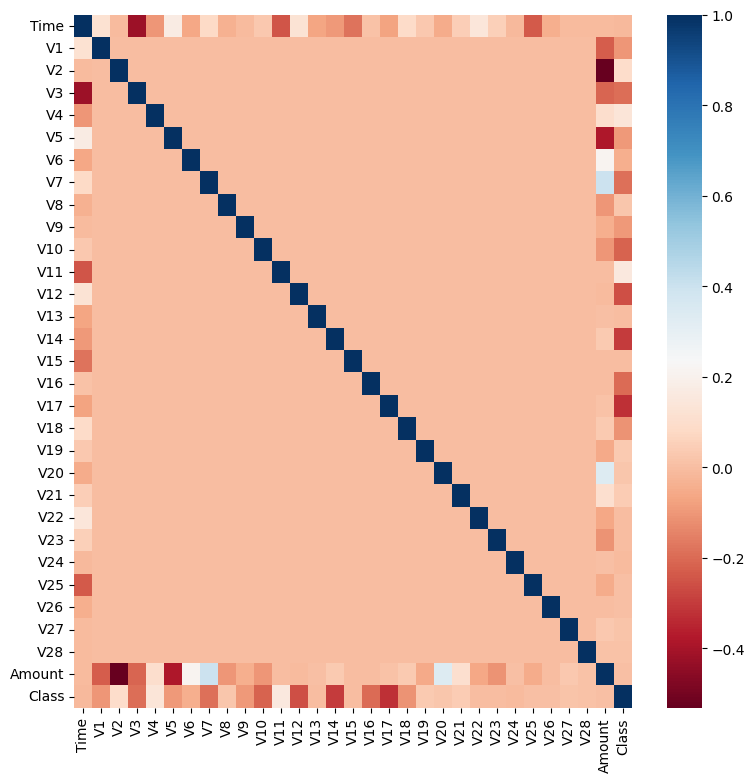

In [35]:
import seaborn as sns

plt.figure(figsize = (9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap = 'RdBu')

In [36]:
import numpy as np

def get_outlier(df = None, column = None, weight = 1.5):
  fraud = df[df['Class'] ==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr*weight
  lowest_val = quantile_25 - iqr_weight
  hightest_val = quantile_75 + iqr_weight
  outlier_index = fraud[(fraud <lowest_val)|(fraud>hightest_val)].index
  return outlier_index

outlier_index = get_outlier(df = card_df, column = 'V14', weight = 1.5)
print('이상치 데이터의 인덱스: ', outlier_index)

이상치 데이터의 인덱스:  Index([8296, 8615, 9035, 9252], dtype='int64')


##SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199364, 29) (199364,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포:
 Class
0    199020
1    199020
Name: count, dtype: int64


In [38]:
lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf, ftr_train = X_train_over, ftr_test = X_test, tgt_train = y_train_over, tgt_test = y_test)

오차행렬
[[83321  1974]
 [   15   133]]
정확도: 0.9767, 정밀도: 0.0631, 재현율: 0.8986, F10.1180, AUC: 0.9378


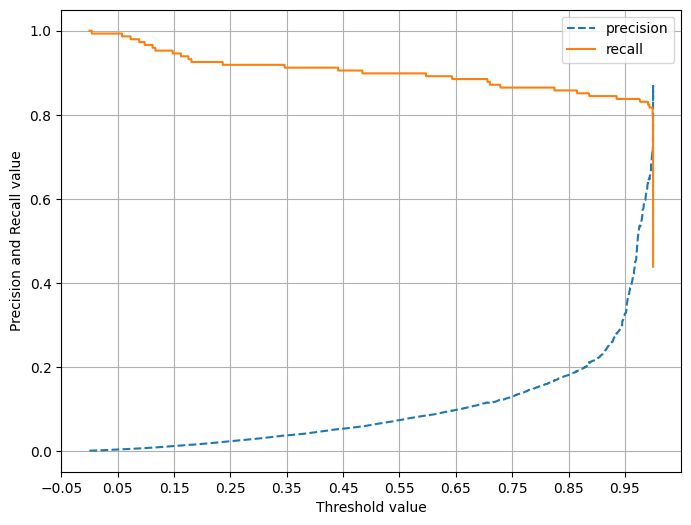

In [39]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize = (8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [40]:
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train_over, ftr_test = X_test, tgt_train = y_train_over, tgt_test = y_test)

오차행렬
[[85284    11]
 [   32   116]]
정확도: 0.9995, 정밀도: 0.9134, 재현율: 0.7838, F10.8436, AUC: 0.8918
